Mounted at /content/drive
Dataset folder found: /content/drive/MyDrive/understanding_cloud_organization/train_images
Number of files in dataset: 1574
Sample files: ['88c8427.jpg', '8a06dc7.jpg', '88d661c.jpg', '88a5cde.jpg', '87522a2.jpg', '87fd65c.jpg', '87fffff.jpg', '89a041e.jpg', '88232e1.jpg', '8a31db4.jpg']


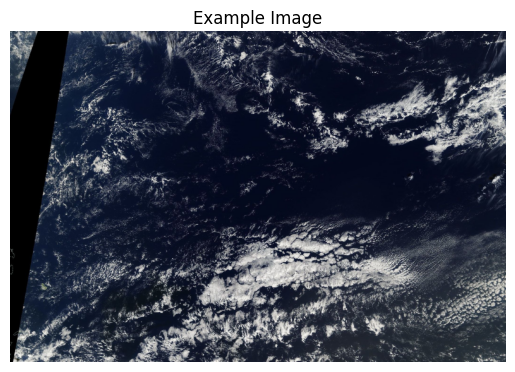

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
#Navigate to the dataset folder
import os
import matplotlib.pyplot as plt
from PIL import Image
dataset_path = '/content/drive/MyDrive/understanding_cloud_organization/train_images'
# Check if the folder exists
if os.path.exists(dataset_path):
    print(f"Dataset folder found: {dataset_path}")
else:
    print(f"Dataset folder not found at {dataset_path}. Please check the path.")
# Example: Assuming the dataset contains images and masks
files = os.listdir(dataset_path)
print(f"Number of files in dataset: {len(files)}")
print(f"Sample files: {files[:10]}")  # Display first 10 files

example_image_path = os.path.join(dataset_path, '88d661c.jpg')
if os.path.exists(example_image_path):
    image = Image.open(example_image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Example Image')
    plt.show()
else:
    print(f"Example image not found: {example_image_path}.")

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Paths to dataset
train_images_path = '/content/drive/MyDrive/understanding_cloud_organization/train_images'
test_images_path = '/content/drive/MyDrive/understanding_cloud_organization/test_images'
train_csv_path = '/content/drive/MyDrive/understanding_cloud_organization/train.csv'
sample_submission_csv_path = '/content/drive/MyDrive/understanding_cloud_organization/sample_submission.csv'

# Add a check for the existence of the CSV file
if os.path.exists(train_csv_path):
    print(f"Train CSV file found: {train_csv_path}")
    # Load the train.csv file
    train_df = pd.read_csv(train_csv_path)
    train_df = train_df.sample(600) #taking the 600 images only
else:
    print(f"Train CSV file not found at {train_csv_path}. Please check the path and Google Drive mounting.")

Train CSV file found: /content/drive/MyDrive/understanding_cloud_organization/train.csv


In [ ]:
# Display the first few rows of the DataFrame
print("First few rows of the train.csv file:")
print(train_df.head())
# Check basic statistics
print("\nDataset Summary:")
print(f"Number of rows in train.csv: {len(train_df)}")
unique_images = train_df['Image_Label'].apply(lambda x: x.split('_')[0]).unique()
print(f"Number of unique images in train.csv: {len(unique_images)}")
print(f"Unique labels in train.csv: {train_df['Image_Label'].apply(lambda x: x.split('_')[1]).unique()}")

First few rows of the train.csv file:
              Image_Label                                      EncodedPixels
19217  de0f65a.jpg_Flower  30 1361 1430 1361 2830 1361 4230 1361 5630 136...
18491   d60352a.jpg_Sugar  1499511 434 1499961 8 1500911 427 1501340 5 15...
12472    8de15dd.jpg_Fish  1139 261 2539 261 3939 261 5339 261 6739 261 8...
16446  bd7a947.jpg_Gravel                                                NaN
19881  e530d59.jpg_Flower                                                NaN

Dataset Summary:
Number of rows in train.csv: 600
Number of unique images in train.csv: 577
Unique labels in train.csv: ['Flower' 'Sugar' 'Fish' 'Gravel']


In [ ]:
# Function to decode Run-Length Encoding (RLE)
def rle_decode(mask_rle, shape=(1400, 2100)):
    """
    Decode run-length encoded mask into a binary mask.
    Args:
        mask_rle (str): Run-length as string format (start length)
        shape (tuple): Shape of the mask (height, width)
    Returns:
        numpy array: Decoded binary mask
    """
    if pd.isnull(mask_rle):
        return np.zeros(shape, dtype=np.uint8)

    s = list(map(int, mask_rle.split()))
    starts, lengths = s[0::2], s[1::2]
    starts = np.array(starts) - 1
    ends = starts + lengths
    mask = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for start, end in zip(starts, ends):
        mask[start:end] = 1
    return mask.reshape(shape, order='F')


In [ ]:
# Visualize an image and its corresponding masks
def visualize_image_with_masks(image_name, df):
    """
    Visualizes an image and all its corresponding class masks.
    Args:
        image_name (str): The name of the image file (e.g., 'image.jpg')
        df (pd.DataFrame): The train DataFrame containing 'Image_Label' and 'EncodedPixels'
    """
    image_path = os.path.join(train_images_path, image_name)
    image = Image.open(image_path)

    # Initialize a blank mask to combine all class masks
    combined_mask = np.zeros((1400, 2100), dtype=np.uint8)

    # Loop through each cloud class mask for the given image
    labels = df[df['Image_Label'].str.startswith(image_name)]
    for _, row in labels.iterrows():
        label = row['Image_Label'].split('_')[1]  # Extract cloud type (e.g., 'Fish')
        encoded_pixels = row['EncodedPixels']
        mask = rle_decode(encoded_pixels)
        combined_mask += mask  # Combine the masks for visualization

        # Plot individual masks for each cloud class
        plt.figure(figsize=(5, 5))
        plt.imshow(mask, cmap='gray')
        plt.axis('off')
        plt.title(f"{image_name} - {label} Mask")
        plt.show()

    # Plot the original image and combined mask
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Image')

    plt.subplot(1, 2, 2)
    plt.imshow(combined_mask, cmap='gray')
    plt.axis('off')
    plt.title('Combined Mask')
    plt.show()

In [ ]:
# Display the first few rows of the DataFrame
print("First few rows of the train.csv file:")
print(train_df.head())
# Check basic statistics
print("\nDataset Summary:")
print(f"Number of rows in train.csv: {len(train_df)}")

# Recalculate unique_images after sampling train_df
unique_images = train_df['Image_Label'].apply(lambda x: x.split('_')[0]).unique()

print(f"Number of unique images in train.csv: {len(unique_images)}")
print(f"Unique labels in train.csv: {train_df['Image_Label'].apply(lambda x: x.split('_')[1]).unique()}")

First few rows of the train.csv file:
              Image_Label                                      EncodedPixels
19217  de0f65a.jpg_Flower  30 1361 1430 1361 2830 1361 4230 1361 5630 136...
18491   d60352a.jpg_Sugar  1499511 434 1499961 8 1500911 427 1501340 5 15...
12472    8de15dd.jpg_Fish  1139 261 2539 261 3939 261 5339 261 6739 261 8...
16446  bd7a947.jpg_Gravel                                                NaN
19881  e530d59.jpg_Flower                                                NaN

Dataset Summary:
Number of rows in train.csv: 600
Number of unique images in train.csv: 577
Unique labels in train.csv: ['Flower' 'Sugar' 'Fish' 'Gravel']


In [ ]:
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
# Parameters
IMG_HEIGHT, IMG_WIDTH = 256, 256  # Target image size
SEED = 42  # Random seed for reproducibility

In [ ]:
# Function to preprocess images
def preprocess_image(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    """
    Load and resize an image.
    Args:
        image_path (str): Path to the image file.
        img_height (int): Target height.
        img_width (int): Target width.
    Returns:
        numpy array: Preprocessed image.
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (img_width, img_height))  # Resize
    image = image / 255.0  # Normalize to [0, 1]
    return image


In [ ]:
# Function to preprocess masks
def preprocess_mask(mask, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    """
    Resize a mask to the target dimensions.
    Args:
        mask (numpy array): Binary mask.
        img_height (int): Target height.
        img_width (int): Target width.
    Returns:
        numpy array: Resized mask.
    """
    mask = cv2.resize(mask, (img_width, img_height), interpolation=cv2.INTER_NEAREST)
    return mask

In [ ]:
# Create training data
def create_dataset(df, train_images_path):
    """
    Create datasets for training and validation.
    Args:
        df (pd.DataFrame): DataFrame containing Image_Label and EncodedPixels.
        train_images_path (str): Path to the training images folder.
    Returns:
        lists: Images and masks as arrays.
    """
    images, masks = [], []
    unique_images = df['Image_Label'].apply(lambda x: x.split('_')[0]).unique()

    for image_name in unique_images:
        image_path = os.path.join(train_images_path, image_name)
        image = preprocess_image(image_path)  # Preprocess image

        # Create combined mask for all cloud classes
        labels = df[df['Image_Label'].str.startswith(image_name)]
        combined_mask = np.zeros((1400, 2100), dtype=np.uint8)

        for _, row in labels.iterrows():
            encoded_pixels = row['EncodedPixels']
            mask = rle_decode(encoded_pixels)  # Decode RLE to binary mask
            combined_mask += mask  # Combine masks for all classes

        # Preprocess mask
        combined_mask = preprocess_mask(combined_mask)

        images.append(image)
        masks.append(combined_mask)

    return np.array(images), np.array(masks)

In [ ]:
# Create training data
def create_dataset(df, train_images_path):
    """
    Create datasets for training and validation.
    Args:
        df (pd.DataFrame): DataFrame containing Image_Label and EncodedPixels.
        train_images_path (str): Path to the training images folder.
    Returns:
        lists: Images and masks as arrays.
    """
    images, masks = [], []
    unique_images = df['Image_Label'].apply(lambda x: x.split('_')[0]).unique()

    for image_name in unique_images:
        image_path = os.path.join(train_images_path, image_name)

        # Add a check to ensure the image file exists
        if not os.path.exists(image_path):
            print(f"Warning: Image file not found: {image_path}. Skipping.")
            continue  # Skip to the next image if the file is not found

        image = preprocess_image(image_path)  # Preprocess image

        # Create combined mask for all cloud classes
        labels = df[df['Image_Label'].str.startswith(image_name)]
        combined_mask = np.zeros((1400, 2100), dtype=np.uint8)

        for _, row in labels.iterrows():
            encoded_pixels = row['EncodedPixels']
            mask = rle_decode(encoded_pixels)  # Decode RLE to binary mask
            combined_mask += mask  # Combine masks for all classes

        # Preprocess mask
        combined_mask = preprocess_mask(combined_mask)

        images.append(image)
        masks.append(combined_mask)

    return np.array(images), np.array(masks)


In [ ]:
# Convert to TensorFlow dataset
def to_tf_dataset(images, masks, batch_size=16):
    """
    Convert images and masks to a TensorFlow dataset.
    Args:
        images (numpy array): Array of preprocessed images.
        masks (numpy array): Array of preprocessed masks.
        batch_size (int): Batch size for the dataset.
    Returns:
        tf.data.Dataset: TensorFlow dataset.
    """
    dataset = tf.data.Dataset.from_tensor_slices((images, masks))
    dataset = dataset.shuffle(len(images)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# --- Add the following lines before calling to_tf_dataset ---

# Create images and masks arrays using the create_dataset function
images, masks = create_dataset(train_df, train_images_path)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=SEED)

# --- End of added lines ---

batch_size = 16
train_dataset = to_tf_dataset(X_train, y_train, batch_size=batch_size)
val_dataset = to_tf_dataset(X_val, y_val, batch_size=batch_size)

print("Datasets are ready!")


Datasets are ready!


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.applications import VGG16 # Import VGG16


# 1. Load and preprocess data
train_dir = 'path/to/train_data'
val_dir = 'path/to/val_data'

# ImageDataGenerator for image augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalize image data
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

#  Use flow (not flow_from_directory) since  have NumPy arrays
train_generator = train_datagen.flow(
    X_train, y_train,             # Use  NumPy arrays
    batch_size=32,

)

validation_generator = val_datagen.flow(
    X_val, y_val,                 # Use your NumPy arrays
    batch_size=32,

)

In [ ]:
# 2. Load a pre-trained model (VGG16) - align with later code and avoid initial weight loading error
# Load the pre-trained VGG16 model without the top (fully connected layers)
base_model = VGG16(weights=None, include_top=False, # Load without weights initially
                       input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# 3. Build the model on top of VGG16 (using the already defined Sequential model)
# The model structure is already defined in a later cell using Sequential.
# We will continue using that approach and add the weight loading there.

# Assuming the Sequential model structure in the next relevant cell is used:
 model = Sequential([
    base_model,  # Add the pre-trained VGG16 base model
    Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
     Conv2DTranspose(1, (3, 3), strides=(16, 16), padding='same', activation='sigmoid'), # Output a single channel mask
 ])

# Instead of redefining the model here, we will modify the subsequent cell where
# the Sequential model is built to load the weights after construction.
# The code in this cell (ipython-input-32-2eeb5b8633a4) should ideally be replaced
# or merged with the later cell that uses VGG16.

# For now, let's comment out or remove the redundant model definition in this cell
# and focus on the later cell that defines the VGG16-based Sequential model.

# The following lines are redundant if the Sequential model is defined later
 x = base_model.output
 x = tf.keras.layers.Conv2DTranspose(1, (32, 32), strides=(32, 32),
                                     activation='sigmoid', padding='same')(x)
 model = Model(inputs=base_model.input, outputs=x)

# 4. Compile the model (This will be done in the later cell)
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train the model (This will be done in the later cell)
 history = model.fit(
    train_generator,
     epochs=10,
     validation_data=validation_generator
 )

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

In [ ]:
# 2. Load a pre-trained model (ResNet50)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# 3. Build the model on top of ResNet50
x = base_model.output

# Adjust the strides and kernel size in Conv2DTranspose to get the desired output shape
# Original: x = tf.keras.layers.Conv2DTranspose(1, (64, 64), strides=(64, 64), activation='sigmoid', padding='same')(x)
x = tf.keras.layers.Conv2DTranspose(1, (32, 32), strides=(32, 32),  # Adjusted strides and kernel size
                                    activation='sigmoid', padding='same')(x) #Padding same will upsample to input size

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# 4. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 57s 13s/step - accuracy: 0.6850 - loss: 0.6444 - val_accuracy: 0.8345 - val_loss: 0.5728
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 77s 11s/step - accuracy: 0.8273 - loss: 0.5707 - val_accuracy: 0.8345 - val_loss: 0.5515
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 10s/step - accuracy: 0.8424 - loss: 0.5374 - val_accuracy: 0.8345 - val_loss: 0.5102
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 10s/step - accuracy: 0.8485 - loss: 0.4795 - val_accuracy: 0.8345 - val_loss: 0.4791
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 11s/step - accuracy: 0.8629 - loss: 0.4444 - val_accuracy: 0.8345 - val_loss: 0.4705
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 12s/step - accuracy: 0.8366 - loss: 0.4693 - val_accuracy: 0.8345 - val_loss: 0.4632
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 12s/step - accuracy: 0.8566 - loss: 0.4339 - val_accuracy: 0.8345 - val_loss: 0.4633
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 12s/step - accuracy: 0.8503 - loss: 0.4389 - val_accuracy: 0.8345 - val_loss: 0.4613


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Confusion Matrix:
[[1749986       0]
 [ 347166       0]]

Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

  background       0.83      1.00      0.91   1749986
       cloud       0.00      0.00      0.00    347166

    accuracy                           0.83   2097152
   macro avg       0.42      0.50      0.45   2097152
weighted avg       0.70      0.83      0.76   2097152



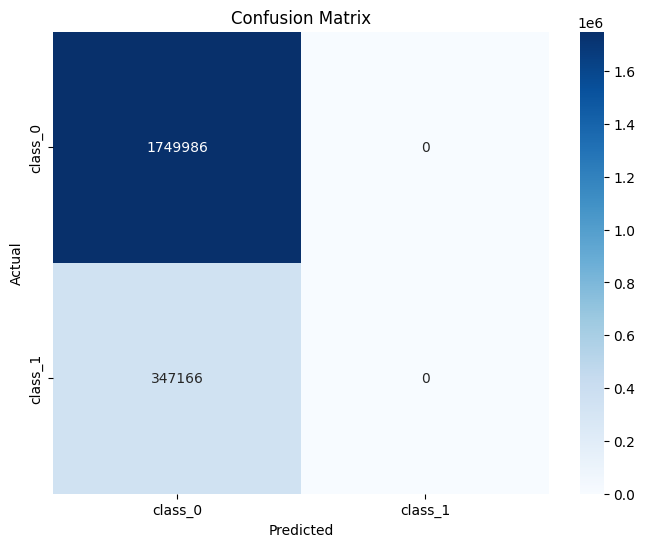

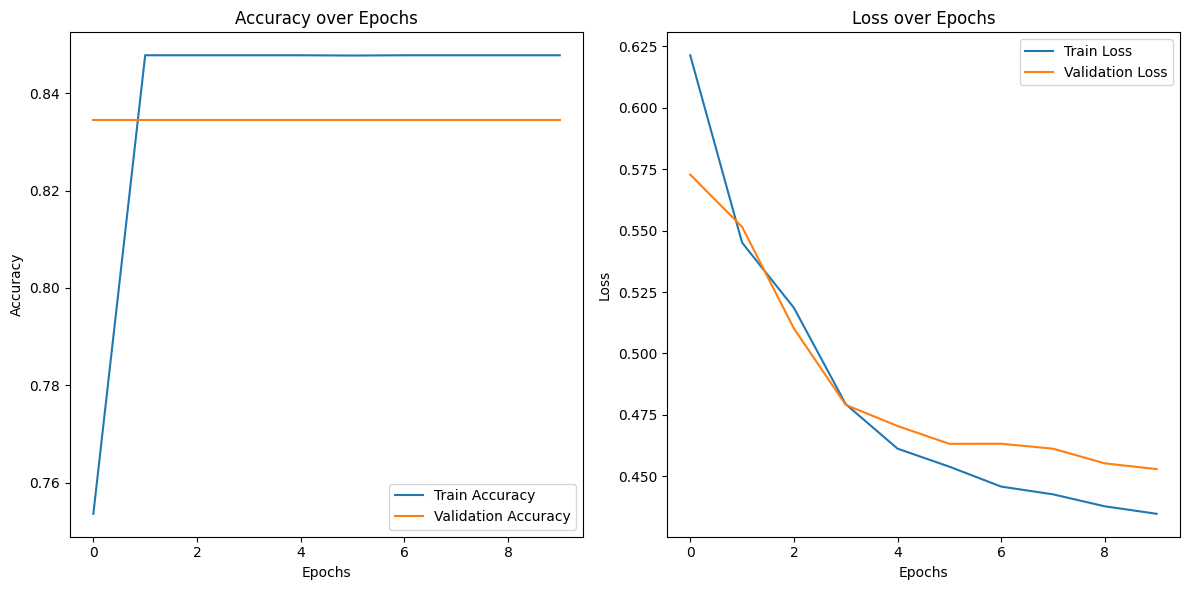

In [ ]:
# 6. Evaluate the model
# Get predictions
y_pred = model.predict(validation_generator)
y_pred_classes = np.round(y_pred).astype(int)

# Get true labels
y_true = y_val

# Confusion Matrix
cm = confusion_matrix(y_true.flatten(), y_pred_classes.flatten())
print("Confusion Matrix:")
print(cm)

# Classification Report
target_names = ['background', 'cloud']  # Example: Assuming 0 is background and 1 is cloud
print("\nClassification Report:")
unique_classes = np.unique(np.concatenate([y_true.flatten(), y_pred_classes.flatten()]))
print(classification_report(y_true.flatten(), y_pred_classes.flatten(),
                            labels=unique_classes, target_names=target_names))
# 7. Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 8. Plotting training and validation accuracy/loss over epochs
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

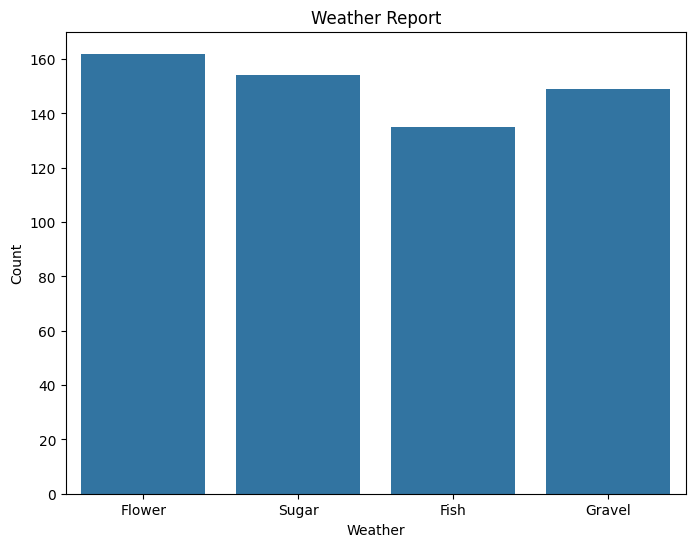

In [ ]:
# Define the training and testing directories
train_dir = X_train # Corrected path
test_dir = X_val  # Corrected path

# Define the categories
categories = ["cloudy", "sunny"] # Corrected categories
# Create a DataFrame with image names and categories from your train_df
image_names = train_df['Image_Label'].apply(lambda x: x.split('_')[0]).unique()

train_data = []
for image_name in image_names:
    # Get the categories for this image
    image_categories = train_df[train_df['Image_Label'].str.startswith(image_name)]['Image_Label'].apply(lambda x: x.split('_')[1]).tolist()

    # Add a row for each category the image belongs to
    for category in image_categories:
        train_data.append({'Image': image_name, 'Category': category})

train_df_viz = pd.DataFrame(train_data)

# Visualize the distribution of cloud types
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df_viz, x="Category")  # Use countplot for category distribution
plt.title("Weather Report")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()


In [ ]:
# Define the training and testing directories - Correcting the paths
train_dir = train_images_path  # Corrected path - use the actual path to training images
test_dir = test_images_path  # Corrected path - use the actual path to test images (if needed)

# Check for subdirectories within the train directory
print(os.listdir(train_dir))

# Check if subdirectories contain images
for subdir in os.listdir(train_dir):
    subdir_path = os.path.join(train_dir, subdir)
    if os.path.isdir(subdir_path):
        print(f"{subdir}: {len(os.listdir(subdir_path))} images")

# Visualize sample images for each tumor type
plt.figure(figsize=(12, 8))

# Get unique image names for each category from your train_df
image_names_by_category = train_df.groupby('Image_Label').apply(lambda x: x['Image_Label'].iloc[0].split('_')[0]).to_dict()
category_mapping = {
    'Fish': 'cloudy',  # Assuming 'Fish' category maps to your 'cloudy' folder
    'Flower': 'sunny', # Assuming 'Flower' category maps to your 'sunny' folder
    'Gravel': 'cloudy',  # Assuming 'Gravel' category maps to your 'cloudy' folder
    'Sugar': 'cloudy' # Assuming 'Sugar' category maps to your 'cloudy' folder
}  # Add more mappings if you have other categories

for i, category in enumerate(categories):
    # Get an image name for the current category (if available)
    print(category)

    image_name = next((image_names_by_category[k] for k in image_names_by_category if category_mapping.get(k.split('_')[1]) == category), None)

    if image_name:
        image_path = os.path.join(train_dir, image_name)  # Use image_name directly
        if os.path.exists(image_path):  # Check if image file exists
            img = plt.imread(image_path)
            plt.subplot(2, 2, i+1)
            plt.imshow(img)
            plt.title(category)
            plt.axis("off")
        else:
            print(f"Image file not found: {image_path}")  # Print message if not found
    else:
        print(f"No image found for category: {category}")  # Print message if no image found
plt.tight_layout()
plt.show()

['88c8427.jpg', '8a06dc7.jpg', '88d661c.jpg', '88a5cde.jpg', '87522a2.jpg', '87fd65c.jpg', '87fffff.jpg', '89a041e.jpg', '88232e1.jpg', '8a31db4.jpg', '8955b11.jpg', '888f3b3.jpg', '885d1dc.jpg', '88c4a63.jpg', '88fabe6.jpg', '876ee4b.jpg', '8825f6a.jpg', '8975e8e.jpg', '89385df.jpg', '87a1831.jpg', '8667994.jpg', '8673664.jpg', '8816d0d.jpg', '87d98b9.jpg', '87209c5.jpg', '87ee31f.jpg', '87dfdfc.jpg', '8690794.jpg', '8639a89.jpg', '872b64a.jpg', '8913c6f.jpg', '8819d96.jpg', '86bca9b.jpg', '86fb735.jpg', '88b5f22.jpg', '87fae41.jpg', '86321fe.jpg', '874645a.jpg', '86c5896.jpg', '8695732.jpg', '874e832.jpg', '8553a23.jpg', '8643e86.jpg', '85c1f5f.jpg', '86ab75c.jpg', '8701794.jpg', '84f928a.jpg', '86fa18e.jpg', '87c0713.jpg', '8583d04.jpg', '8412df9.jpg', '874c9df.jpg', '85eabc1.jpg', '856e1e3.jpg', '86d5dda.jpg', '858c461.jpg', '864d484.jpg', '87dc46a.jpg', '85ccc87.jpg', '862978f.jpg', '8598065.jpg', '870f5a4.jpg', '8619258.jpg', '8783c33.jpg', '855ae90.jpg', '860f67f.jpg', '8826bd9.

<ipython-input-25-2ab2dde0a81d>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  image_names_by_category = train_df.groupby('Image_Label').apply(lambda x: x['Image_Label'].iloc[0].split('_')[0]).to_dict()


<Figure size 1200x800 with 0 Axes>

In [ ]:
# ImageDataGenerator for image augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalize image data
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

#  Use flow (not flow_from_directory) since you have NumPy arrays
train_generator = train_datagen.flow(
    X_train, y_train,             # Use your NumPy arrays
    batch_size=32,
)

validation_generator = val_datagen.flow(
    X_val, y_val,                 # Use your NumPy arrays
    batch_size=32,
)

In [ ]:
!pip install keras-tuner
from kerastuner.tuners import RandomSearch  # Import RandomSearch or other tuner class
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer


def tune_model(train_generator, validation_generator):
    """
    Tunes the model using Keras Tuner and returns the best hyperparameters and model.
    """
    tuner = RandomSearch(
        build_model,  # Pass the model-building function
        objective='val_accuracy',  # Define the objective to optimize
        max_trials=5,  # Number of hyperparameter combinations to try
        executions_per_trial=3,  # Number of models to train for each combination
        directory='my_dir',  # Directory to store results
        project_name='cloud_classification'  # Project name
    )

    tuner.search(
        train_generator,
        epochs=epochs,
        validation_data=test_generator,
    )

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    model = tuner.hypermodel.build(best_hps)
    return best_hps, model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


<ipython-input-27-9ac9ebbf0189>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch  # Import RandomSearch or other tuner class


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Conv2DTranspose # Import Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


# Set the image size
image_size = (256,256)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 2

# Load the pre-trained VGG16 model without the top (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False,
                       input_shape=(image_size[0], image_size[1], 3))
# Freeze the layers of the base model so that they are not updated during training
base_model.trainable = False

# Build the hybrid model
model = Sequential([
    base_model,  # Add the pre-trained VGG16 base model
    Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    Conv2DTranspose(1, (3, 3), strides=(16, 16), padding='same', activation='sigmoid'), # Output a single channel mask
])

model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 64)     │       294,976 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 256, 256, 1)    │           577 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,010,241 (57.26 MB)

 Trainable params: 295,553 (1.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Load the pre-trained VGG16 model with the correct input shape
base_model = VGG16(weights='imagenet', include_top=False,
                    input_shape=(image_size[0], image_size[1], 3))


# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,  # Calculate steps per epoch manually
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(X_val) // batch_size  # Calculate validation steps manually
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 153s 38s/step - accuracy: 0.8333 - loss: 0.6922 - val_accuracy: 0.8329 - val_loss: 0.6894
Epoch 2/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 136s 37s/step - accuracy: 0.8547 - loss: 0.6884 - val_accuracy: 0.8345 - val_loss: 0.6862


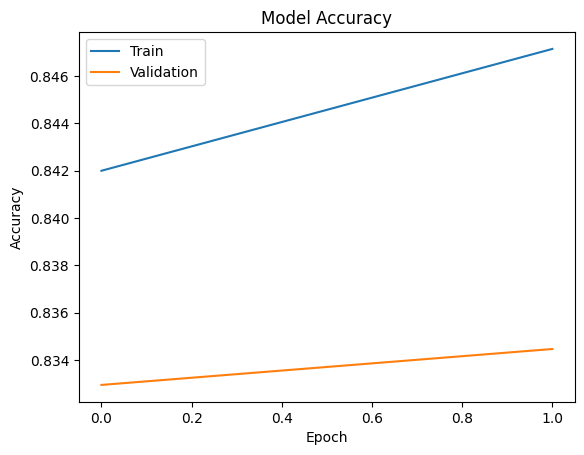

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

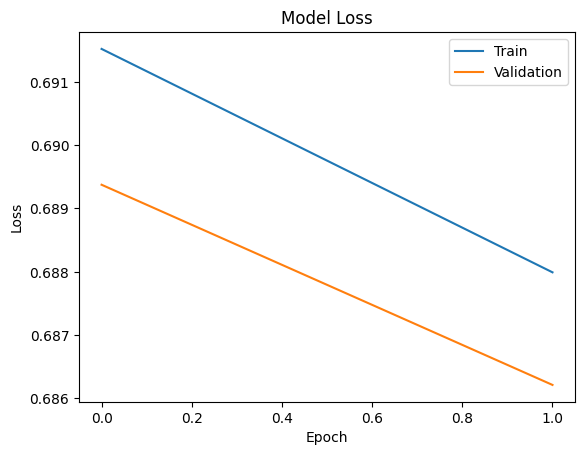

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
#  Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=len(X_val) // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - accuracy: 0.8345 - loss: 0.6862
Test Loss: 0.6862137317657471
Test Accuracy: 0.8344583511352539


1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step


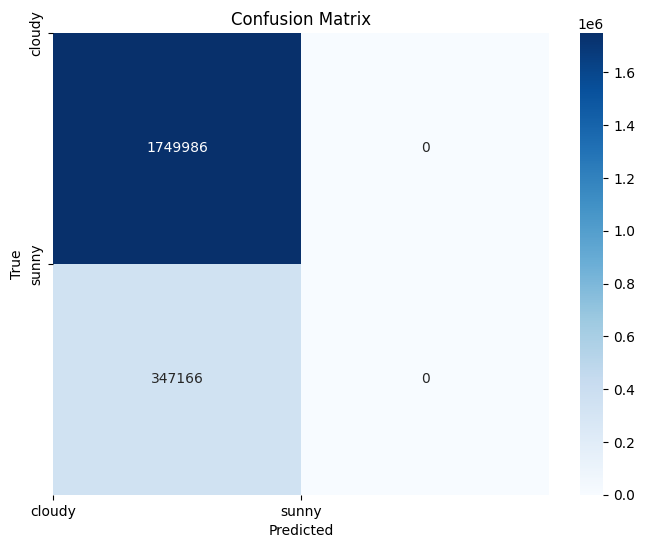

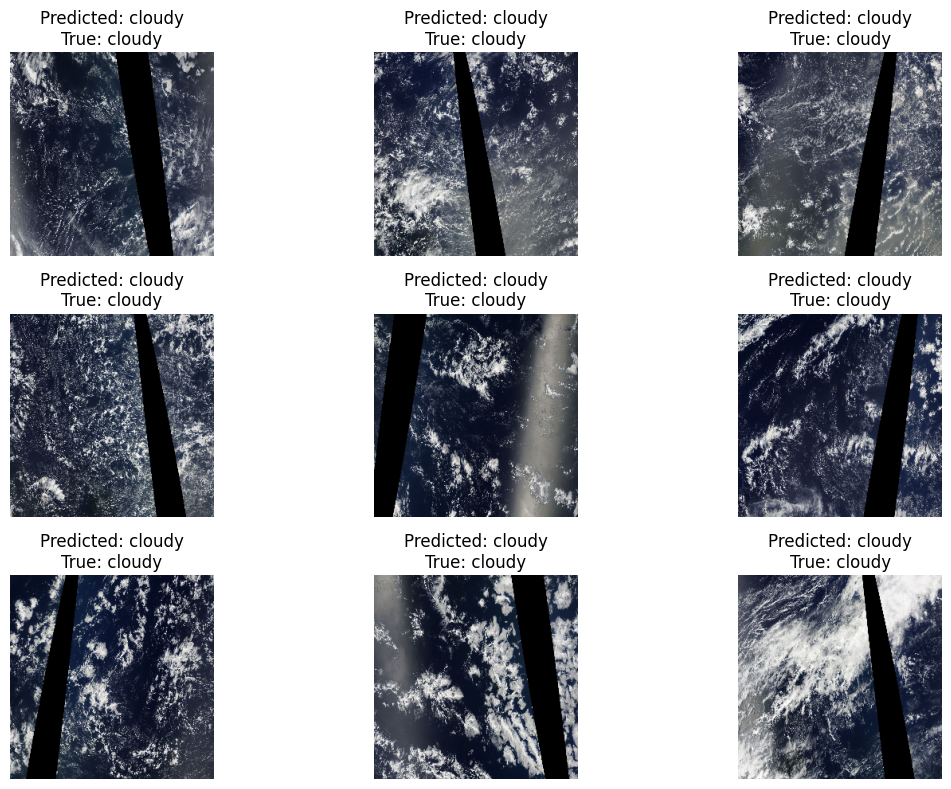

In [ ]:
# Make predictions on the test dataset
predictions = model.predict(validation_generator)
true_categories_flat = y_val.flatten()  # Assuming y_val is your ground truth mask array

true_categories_flat = true_categories_flat.astype(np.int32) # Convert to int
predictions_flat = (predictions.flatten() > 0.5).astype(np.int32) #Convert prediction probabilities to binary and int type

# Now calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories_flat, predictions_flat)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Get predicted categories (0 or 1) based on a threshold (e.g., 0.5)
predicted_categories = (predictions.flatten() > 0.5).astype(int)


# Plot sample images with their predicted and true labels
test_images = X_val

num_samples_to_display = min(9, len(test_images)) # Ensure we don't try to display more samples than available

sample_indices = np.random.choice(range(len(test_images)), size=num_samples_to_display, replace=False)

sample_images = [test_images[i] for i in sample_indices]
# Assuming predicted_categories and true_categories are defined and have correct values
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices] # Assuming predicted_categories is defined
sample_true_labels = [categories[true_categories_flat[i]] for i in sample_indices] # Using true_categories_flat instead of true_categories


plt.figure(figsize=(12, 8))
for i in range(num_samples_to_display):
    plt.subplot(3, 3, i+1)
    # Assuming sample_images[i] now contains image data, not a filename
    plt.imshow(sample_images[i])
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

<ipython-input-34-8f3b3850be24>:2: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)


Class: cloudy
Precision: 0.8344583511352539
Recall: 1.0
F1-Score: 0.9097599306289507

Class: sunny
Precision: nan
Recall: 0.0
F1-Score: nan



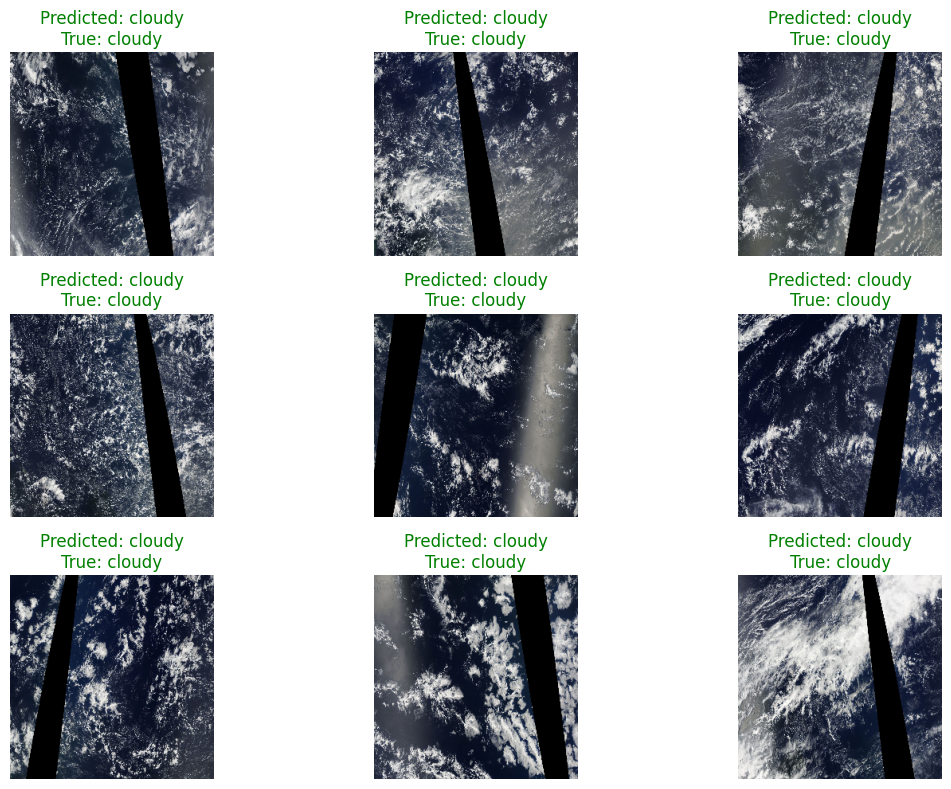

In [ ]:
# Calculate precision, recall, and F1-score from the confusion matrix
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    # Instead of using plt.imread, display the image data directly
    plt.imshow(sample_images[i])
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()
